<a href="https://colab.research.google.com/github/kaisarmasum/Quantum-Machine-Learning/blob/main/HSI_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import struct
import numpy as np

class BilParser:
    def __init__(self, header_path):
        self.header_path = header_path
        self.header = self._parse_header()

    def _parse_header(self):
        if not os.path.exists(self.header_path):
            raise FileNotFoundError(f"Header file not found: {self.header_path}")

        with open(self.header_path, 'rb') as f:
            contents = f.read()

        header_dict = {}
        for line in contents.decode().splitlines():
            try:
                key, value = line.strip().split('=')
                if key:
                    header_dict[key] = value
            except ValueError:
                pass
        return header_dict

header_path = "/content/Skeletalmusclecells.hdr"
try:
    bp = BilParser(header_path)
    print(bp.header)
except FileNotFoundError as e:
    print(f"Error: {e}")

{'interleave ': ' bil', 'data type ': ' 12', 'lines ': ' 500', 'samples ': ' 533', 'bands ': ' 154', 'ceiling ': ' 36855', 'sample binning ': ' 3', 'spectral binning ': ' 6', 'line binning ': ' 1', 'shutter ': ' 16.12', 'gain ': ' 0', 'framerate ': ' 60.8013619505', 'imager serial number ': ' 100124-95', 'byte order ': ' 0', 'header offset ': ' 0', 'wavelength ': ' {389.923333333, 393.873333333, 397.82, 401.77, 405.72, 409.673333333, 413.626666667, 417.58, 421.536666667, 425.49, 429.45, 433.41, 437.37, 441.33, 445.29, 449.25, 453.21, 457.176666667, 461.14, 465.106666667, 469.073333333, 473.04, 477.01, 480.98, 484.95, 488.923333333, 492.896666667, 496.866666667, 500.843333333, 504.82, 508.796666667, 512.773333333, 516.753333333, 520.733333333, 524.713333333, 528.696666667, 532.68, 536.66, 540.65, 544.63, 548.62, 552.61, 556.6, 560.59, 564.58, 568.57, 572.56, 576.556666667, 580.55, 584.546666667, 588.54, 592.54, 596.54, 600.536666667, 604.54, 608.54, 612.543333333, 616.546666667, 620.553

In [ ]:
!pip install spectral

In [ ]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

from operator import truediv

from plotly.offline import init_notebook_mode

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
!pip install spectral
import spectral
import seaborn as sns

%matplotlib inline

In [ ]:
ref = envi.open('/content/Skeletalmusclecells.bil.hdr', '/content/Skeletalmusclecells.bil')
data = ref.load()

In [ ]:
data = np.array(data)

In [ ]:
data

array([[[2., 3., 3., ..., 1., 2., 1.],
        [1., 1., 1., ..., 0., 1., 0.],
        [1., 1., 1., ..., 0., 0., 3.],
        ...,
        [0., 2., 1., ..., 0., 1., 0.],
        [3., 1., 0., ..., 0., 0., 0.],
        [1., 3., 0., ..., 0., 0., 1.]],

       [[2., 3., 3., ..., 0., 0., 1.],
        [0., 3., 2., ..., 1., 0., 2.],
        [0., 3., 2., ..., 0., 0., 1.],
        ...,
        [1., 4., 1., ..., 0., 0., 0.],
        [3., 1., 0., ..., 0., 1., 1.],
        [3., 0., 2., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [2., 3., 0., ..., 0., 0., 1.],
        [1., 2., 1., ..., 0., 1., 1.],
        [2., 1., 1., ..., 0., 1., 0.]],

       ...,

       [[2., 1., 1., ..., 1., 0., 1.],
        [1., 0., 4., ..., 0., 1., 0.],
        [2., 2., 1., ..., 1., 2., 0.],
        ...,
        [1., 4., 2., ..., 2., 1., 0.],
        [1., 3., 1., ..., 0., 0., 2.],
        [2., 1., 3., ..., 1., 0.

In [ ]:
data.shape

(500, 533, 154)

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning:

Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.



ImageView object:
  Display bands       :  [0, 77.0, 153]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 12.0]
    G: [117.0, 335.0]
    B: [0.0, 9.0]

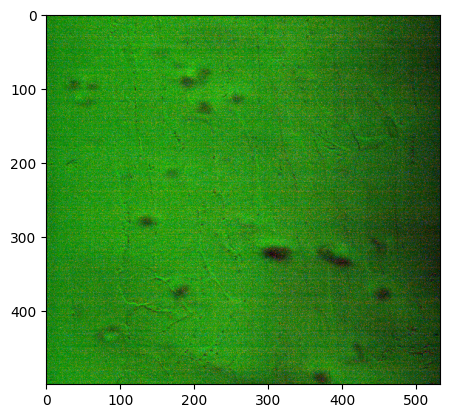

In [ ]:
imshow(data)

In [ ]:
data.shape

(500, 533, 154)

In [ ]:
## 3D wavelet or PCA

In [ ]:
data.max()

7510.0

In [ ]:
data.min()

0.0

ImageView object:
  Display bands       :  [0, 77.0, 153]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 6.0]
    G: [163.0, 264.0]
    B: [0.0, 3.0]

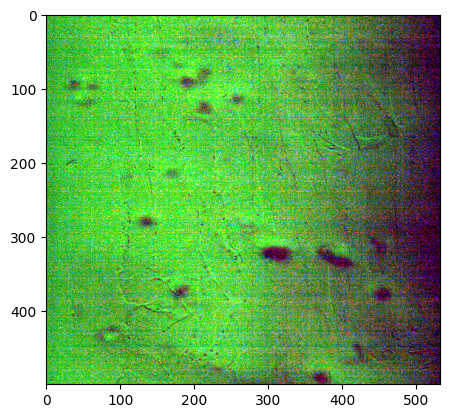

In [ ]:
imshow(data, stretch=0.02)

In [ ]:
from spectral import *
gt = open_image('/content/Skeletalmusclecells.bil.hdr').read_band(0)
gt

array([[2, 1, 1, ..., 0, 3, 1],
       [2, 0, 0, ..., 1, 3, 3],
       [0, 0, 0, ..., 2, 1, 2],
       ...,
       [2, 1, 2, ..., 1, 1, 2],
       [2, 3, 3, ..., 1, 0, 0],
       [4, 3, 1, ..., 0, 2, 1]], dtype=uint16)

In [ ]:
gt.shape

(500, 533)

In [ ]:
np.unique(gt)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint16)

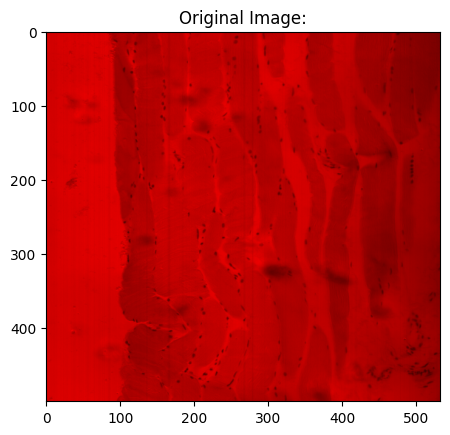

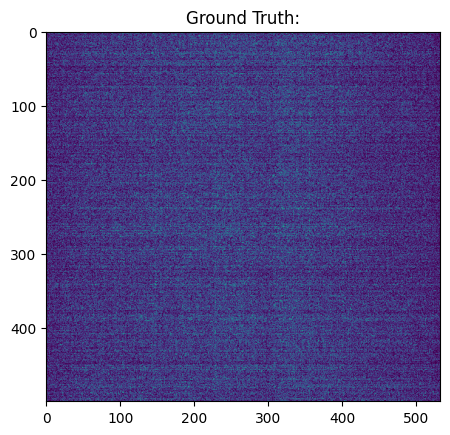

In [ ]:
rgb_bands = [29, 19, 9]
rgb_image = data[:, :, rgb_bands]

rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

plt.title("Original Image:")
plt.imshow((rgb_image * 255).astype(np.uint8))
plt.show()

plt.title("Ground Truth:")
plt.imshow(gt, cmap='viridis')
plt.show()

In [ ]:
print("Pavia shape:", data.shape)
print("Pavia_gt shape:", gt.shape)

Pavia shape: (500, 533, 154)
Pavia_gt shape: (500, 533)


In [ ]:
print("Min value:", np.min(data))
print("Max value:", np.max(data))
print("Data type:", data.dtype)

Min value: 0.0
Max value: 7510.0
Data type: float32


In [ ]:
unique_labels = np.unique(gt)
print("Unique labels in ground truth:", unique_labels)

Unique labels in ground truth: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
# Reshape the data
data_reshaped = rgb_image.reshape((-1, len(rgb_bands)))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_reshaped, gt.ravel(), test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Reshape the data into 3D patches
patch_size = 5
data_patches = []

for i in range(data.shape[0] - patch_size + 1):
    for j in range(data.shape[1] - patch_size + 1):
        patch = rgb_image[i:i+patch_size, j:j+patch_size, :]
        data_patches.append(patch)

data_patches = np.array(data_patches)
data_patches = data_patches.reshape((-1, patch_size, patch_size, len(rgb_bands)))

gt_patches = []

for i in range(gt.shape[0] - patch_size + 1):
    for j in range(gt.shape[1] - patch_size + 1):
        patch = gt[i:i+patch_size, j:j+patch_size]
        gt_patches.append(np.unique(patch)[0])  # Use the most common label in the patch

gt_patches = np.array(gt_patches)

print("Shape of data patches:", data_patches.shape)

Shape of data patches: (262384, 5, 5, 3)


In [ ]:
min_samples = min(data_patches.shape[0], gt_patches.shape[0])
data_patches = data_patches[:min_samples, :]
gt_patches = gt_patches[:min_samples]

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_patches, gt_patches, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(patch_size, patch_size, len(rgb_bands))))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))  # Adjust output size based on your number of classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
5248/5248 [==============================] - 35s 6ms/step - loss: 0.1657 - accuracy: 0.9691 - val_loss: 0.1350 - val_accuracy: 0.9708
Epoch 2/2
5248/5248 [==============================] - 19s 4ms/step - loss: 0.1336 - accuracy: 0.9709 - val_loss: 0.1324 - val_accuracy: 0.9708


1640/1640 [==============================] - 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.97      1.00      0.99     50935
           2       0.00      0.00      0.00      1536
           3       0.00      0.00      0.00         6

    accuracy                           0.97     52477
   macro avg       0.32      0.33      0.33     52477
weighted avg       0.94      0.97      0.96     52477



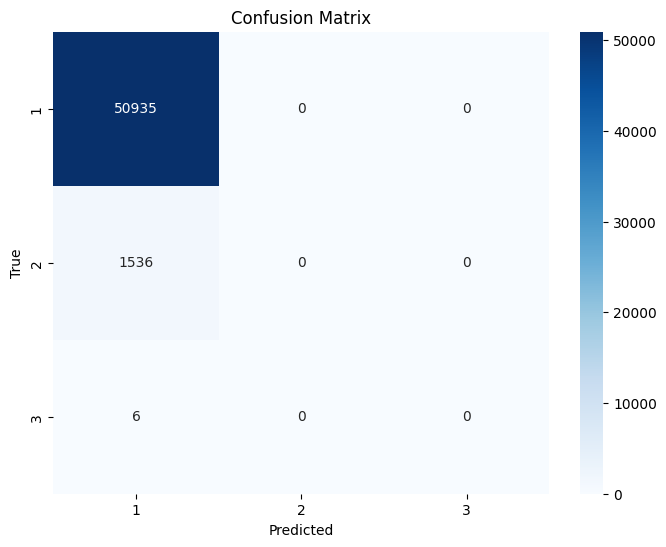

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

target_names = [str(i) for i in range(1, len(np.unique(gt_patches)) + 1)]  # Assuming class labels start from 1
print(classification_report(y_test, y_pred_classes, target_names=target_names))

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

1640/1640 [==============================] - 3s 2ms/step


In [ ]:
from keras.models import Model

# Create a model with multiple outputs, including intermediate layers
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=[model.layers[0].output,model.layers[1].output,
                                          model.layers[2].output,
                                          model.layers[3].output])
intermediate_outputs = intermediate_layer_model.predict(X_train)
print("Input",intermediate_outputs[0])  # Embedding output
print("Convo output",intermediate_outputs[1])  # Embedding output
print("pooling output",intermediate_outputs[2])  # Average pooling output
print("Final predictions",intermediate_outputs[3])  # Final predictions

6560/6560 [==============================] - 14s 2ms/step
Input [[[[1.6976762  1.2464375  1.2949349  ... 0.15011543 1.3280239
    1.2680497 ]
   [1.68558    1.2407963  1.2922456  ... 0.15105504 1.3194511
    1.2602625 ]
   [1.683585   1.2377887  1.2878073  ... 0.1517773  1.316941
    1.2579584 ]]

  [[1.6958057  1.2455816  1.2940161  ... 0.14982921 1.3255342
    1.2685174 ]
   [1.6900077  1.2443585  1.292058   ... 0.1506769  1.3231047
    1.2631979 ]
   [1.6844217  1.2382462  1.2907194  ... 0.15136208 1.3194749
    1.2566614 ]]

  [[1.7041067  1.2480215  1.2986343  ... 0.14882067 1.3314912
    1.272197  ]
   [1.6988764  1.247545   1.296463   ... 0.14879219 1.3285129
    1.269062  ]
   [1.6890645  1.2431092  1.2935739  ... 0.14937152 1.3214812
    1.2622634 ]]]


 [[[1.8472488  1.3439932  1.3978684  ... 0.12509239 1.4279758
    1.3850728 ]
   [1.847708   1.3391807  1.3994167  ... 0.12642325 1.4275603
    1.3829967 ]
   [1.86743    1.3497517  1.410541   ... 0.12244549 1.438175
    1.3981

In [ ]:
intermediate_layer_model = Model(inputs=model.input, outputs=[model.layers[2].output])  # Pooling output only
pooling_output_train_data = intermediate_layer_model.predict(X_train)

6560/6560 [==============================] - 10s 1ms/step


In [ ]:
pooling_output_train_data.shape

(209907, 32)

In [ ]:
pooling_output_test_data = intermediate_layer_model.predict(X_test)

1640/1640 [==============================] - 2s 1ms/step


In [ ]:
!pip install qiskit==0.45.2

In [ ]:
from sklearn.decomposition import KernelPCA
kernel_pca_rbf = KernelPCA(n_components=2, kernel="rbf")
kernel_pca_rbf.fit(pooling_output_train_data)
train_features_rbf = kernel_pca_rbf.transform(pooling_output_train_data)
kernel_pca_rbf.fit(pooling_output_test_data)
test_features_rbf = kernel_pca_rbf.transform(pooling_output_test_data)

In [ ]:
from qiskit.circuit.library import ZZFeatureMap,PauliFeatureMap
num_features = train_features_rbf.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1, entanglement = 'linear',
insert_barriers =True)
feature_map.draw()

NameError: name 'train_features_rbf' is not defined

In [ ]:
print(feature_map.decompose().decompose().depth())

95


In [ ]:
!pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512704 sha256=2028616d0399cbc3f378b2e452962ce2c270140de3296f80561198d405edd448
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [ ]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=1)

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

count = 0
def callback_graph(weights, obj_func_eval):
    global count
    count+=1
    print(count)
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.algorithms.optimizers import ISRES, ADAM, COBYLA
from qiskit.primitives import Sampler

sampler = Sampler()
optimizer = COBYLA(maxiter=10)

In [ ]:
pooling_output_train_data.shape

(209907, 32)

In [ ]:
%%time
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer
)

objective_func_vals = []
vqc.fit(pooling_output_train_data, y_train)

Model 2

In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=f92374ae30d8d1bb51c9edba6ce400eacf6850f1a06c8de0d2c649820df998c1
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
!pip install spectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
import keras
import tensorflow as tf
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import np_utils

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

from operator import truediv

from plotly.offline import init_notebook_mode

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import spectral

init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
if not (os.path.isfile('/content/Indian_pines_corrected.mat')):
  !wget http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat
if not (os.path.isfile('/content/Indian_pines_gt.mat')):
  !wget http://www.ehu.eus/ccwintco/uploads/c/c4/Indian_pines_gt.mat

In [ ]:
## GLOBAL VARIABLES
dataset = 'IP'
test_ratio = 0.7
windowSize = 25

In [ ]:
def loadData(name):
    data_path = os.path.join(os.getcwd(),'')
    if name == 'IP':
        data = sio.loadmat(os.path.join(data_path, '/content/Indian_pines_corrected.mat'))['indian_pines_corrected']
        labels = sio.loadmat(os.path.join(data_path, '/content/Indian_pines_gt.mat'))['indian_pines_gt']
    elif name == 'SA':
        data = sio.loadmat(os.path.join(data_path, '/content/Salinas_corrected.mat'))['salinas_corrected']
        labels = sio.loadmat(os.path.join(data_path, '/content/Salinas_gt.mat'))['salinas_gt']
    elif name == 'PU':
        data = sio.loadmat(os.path.join(data_path, '/content/PaviaU.mat'))['paviaU']
        labels = sio.loadmat(os.path.join(data_path, '/content/PaviaU_gt.mat'))['paviaU_gt']

    return data, labels

In [ ]:
def splitTrainTestSet(X, y, testRatio, randomState=345):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testRatio, random_state=randomState,
                                                        stratify=y)
    return X_train, X_test, y_train, y_test

In [ ]:
def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

In [ ]:
def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

In [ ]:
def createImageCubes(X, y, windowSize=5, removeZeroLabels = True):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)
    # split patches
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]
            patchesData[patchIndex, :, :, :] = patch
            patchesLabels[patchIndex] = y[r-margin, c-margin]
            patchIndex = patchIndex + 1
    if removeZeroLabels:
        patchesData = patchesData[patchesLabels>0,:,:,:]
        patchesLabels = patchesLabels[patchesLabels>0]
        patchesLabels -= 1
    return patchesData, patchesLabels

In [ ]:
X, y = loadData(dataset)

X.shape, y.shape

((145, 145, 200), (145, 145))

In [ ]:
K = X.shape[2]

In [ ]:
K = 30 if dataset == 'IP' else 15
X,pca = applyPCA(X,numComponents=K)

X.shape

(145, 145, 30)

In [ ]:
X, y = createImageCubes(X, y, windowSize=windowSize)

X.shape, y.shape

((10249, 25, 25, 30), (10249,))

In [ ]:
Xtrain, Xtest, ytrain, ytest = splitTrainTestSet(X, y, test_ratio)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((3074, 25, 25, 30), (7175, 25, 25, 30), (3074,), (7175,))

In [ ]:
Xtrain = Xtrain.reshape(-1, windowSize, windowSize, K, 1)
Xtrain.shape

(3074, 25, 25, 30, 1)

In [ ]:
ytrain = keras.utils.to_categorical(ytrain)
ytrain.shape

(3074, 16)

In [ ]:
S = windowSize
L = K
output_units = 9 if (dataset == 'PU' or dataset == 'PC') else 16

In [ ]:
## input layer
input_layer = Input((S, S, L, 1))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 7), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 5), activation='relu')(conv_layer1)
conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(conv_layer2)
#print(conv_layer3._keras_shape)
conv3d_shape = conv_layer3.shape
conv_layer3 = Reshape((conv3d_shape[1], conv3d_shape[2], conv3d_shape[3]*conv3d_shape[4]))(conv_layer3)
conv_layer4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(conv_layer3)

flatten_layer = Flatten()(conv_layer4)

## fully connected layers
dense_layer1 = Dense(units=256, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=128, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=output_units, activation='softmax')(dense_layer2)

In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 25, 25, 30, 1)]   0         
                                                                 
 conv3d_24 (Conv3D)          (None, 23, 23, 24, 8)     512       
                                                                 
 conv3d_25 (Conv3D)          (None, 21, 21, 20, 16)    5776      
                                                                 
 conv3d_26 (Conv3D)          (None, 19, 19, 18, 32)    13856     
                                                                 
 reshape_3 (Reshape)         (None, 19, 19, 576)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 17, 17, 64)        331840    
                                                                 
 flatten_3 (Flatten)         (None, 18496)             0   

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# checkpoint
filepath = "best-model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(x=Xtrain, y=ytrain, batch_size=256, epochs=100, callbacks=callbacks_list)

Epoch 1/100
13/13 [==============================] - ETA: 0s - loss: 2.8703 - accuracy: 0.1373

13/13 [==============================] - 17s 223ms/step - loss: 2.8703 - accuracy: 0.1373
Epoch 2/100
12/13 [==========================>...] - ETA: 0s - loss: 2.4928 - accuracy: 0.2113

13/13 [==============================] - 2s 185ms/step - loss: 2.4923 - accuracy: 0.2115
Epoch 3/100
12/13 [==========================>...] - ETA: 0s - loss: 2.3911 - accuracy: 0.2168

13/13 [==============================] - 2s 184ms/step - loss: 2.3906 - accuracy: 0.2170
Epoch 4/100
12/13 [==========================>...] - ETA: 0s - loss: 2.0916 - accuracy: 0.3206

13/13 [==============================] - 2s 185ms/step - loss: 2.0911 - accuracy: 0.3208
Epoch 5/100
12/13 [==========================>...] - ETA: 0s - loss: 1.7538 - accuracy: 0.4176

13/13 [==============================] - 2s 185ms/step - loss: 1.7543 - accuracy: 0.4174
Epoch 6/100
12/13 [==========================>...] - ETA: 0s - loss: 1.4311 - accuracy: 0.5094

13/13 [==============================] - 2s 188ms/step - loss: 1.4302 - accuracy: 0.5098
Epoch 7/100
12/13 [==========================>...] - ETA: 0s - loss: 1.2411 - accuracy: 0.5775

13/13 [==============================] - 2s 185ms/step - loss: 1.2410 - accuracy: 0.5777
Epoch 8/100
12/13 [==========================>...] - ETA: 0s - loss: 1.0550 - accuracy: 0.6423

13/13 [==============================] - 2s 185ms/step - loss: 1.0546 - accuracy: 0.6425
Epoch 9/100
12/13 [==========================>...] - ETA: 0s - loss: 0.9981 - accuracy: 0.6644

13/13 [==============================] - 2s 186ms/step - loss: 0.9986 - accuracy: 0.6643
Epoch 10/100
12/13 [==========================>...] - ETA: 0s - loss: 0.8255 - accuracy: 0.7256

13/13 [==============================] - 2s 188ms/step - loss: 0.8253 - accuracy: 0.7258
Epoch 11/100
12/13 [==========================>...] - ETA: 0s - loss: 0.6753 - accuracy: 0.7721

13/13 [==============================] - 2s 189ms/step - loss: 0.6753 - accuracy: 0.7723
Epoch 12/100
12/13 [==========================>...] - ETA: 0s - loss: 0.5708 - accuracy: 0.8083

13/13 [==============================] - 2s 187ms/step - loss: 0.5711 - accuracy: 0.8084
Epoch 13/100
12/13 [==========================>...] - ETA: 0s - loss: 0.5462 - accuracy: 0.8128

13/13 [==============================] - 2s 188ms/step - loss: 0.5463 - accuracy: 0.8126
Epoch 14/100
12/13 [==========================>...] - ETA: 0s - loss: 0.5428 - accuracy: 0.8190

13/13 [==============================] - 3s 194ms/step - loss: 0.5425 - accuracy: 0.8191
Epoch 15/100
12/13 [==========================>...] - ETA: 0s - loss: 0.4485 - accuracy: 0.8542

13/13 [==============================] - 3s 196ms/step - loss: 0.4482 - accuracy: 0.8543
Epoch 16/100
12/13 [==========================>...] - ETA: 0s - loss: 0.3435 - accuracy: 0.8877

13/13 [==============================] - 3s 201ms/step - loss: 0.3433 - accuracy: 0.8878
Epoch 17/100
12/13 [==========================>...] - ETA: 0s - loss: 0.2880 - accuracy: 0.9128

13/13 [==============================] - 2s 191ms/step - loss: 0.2886 - accuracy: 0.9125
Epoch 18/100
12/13 [==========================>...] - ETA: 0s - loss: 0.2815 - accuracy: 0.9066

13/13 [==============================] - 2s 190ms/step - loss: 0.2813 - accuracy: 0.9066
Epoch 19/100
12/13 [==========================>...] - ETA: 0s - loss: 0.2705 - accuracy: 0.9134

13/13 [==============================] - 3s 194ms/step - loss: 0.2703 - accuracy: 0.9135
Epoch 20/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1859 - accuracy: 0.9378

13/13 [==============================] - 3s 211ms/step - loss: 0.1858 - accuracy: 0.9379
Epoch 21/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1867 - accuracy: 0.9434

13/13 [==============================] - 3s 212ms/step - loss: 0.1866 - accuracy: 0.9434
Epoch 22/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1595 - accuracy: 0.9518

13/13 [==============================] - 3s 198ms/step - loss: 0.1595 - accuracy: 0.9519
Epoch 23/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1442 - accuracy: 0.9551

13/13 [==============================] - 3s 197ms/step - loss: 0.1442 - accuracy: 0.9551
Epoch 24/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1653 - accuracy: 0.9495

13/13 [==============================] - 3s 197ms/step - loss: 0.1658 - accuracy: 0.9493
Epoch 25/100
12/13 [==========================>...] - ETA: 0s - loss: 0.6949 - accuracy: 0.8288

13/13 [==============================] - 3s 200ms/step - loss: 0.6945 - accuracy: 0.8289
Epoch 26/100
12/13 [==========================>...] - ETA: 0s - loss: 0.3475 - accuracy: 0.8896

13/13 [==============================] - 3s 205ms/step - loss: 0.3478 - accuracy: 0.8894
Epoch 27/100
12/13 [==========================>...] - ETA: 0s - loss: 0.4026 - accuracy: 0.8857

13/13 [==============================] - 3s 194ms/step - loss: 0.4029 - accuracy: 0.8855
Epoch 28/100
12/13 [==========================>...] - ETA: 0s - loss: 0.2915 - accuracy: 0.9053

13/13 [==============================] - 2s 192ms/step - loss: 0.2914 - accuracy: 0.9053
Epoch 29/100
12/13 [==========================>...] - ETA: 0s - loss: 0.3473 - accuracy: 0.8929

13/13 [==============================] - 3s 192ms/step - loss: 0.3472 - accuracy: 0.8930
Epoch 30/100
12/13 [==========================>...] - ETA: 0s - loss: 0.2179 - accuracy: 0.9329

13/13 [==============================] - 3s 194ms/step - loss: 0.2180 - accuracy: 0.9330
Epoch 31/100
12/13 [==========================>...] - ETA: 0s - loss: 0.2048 - accuracy: 0.9333

13/13 [==============================] - 3s 195ms/step - loss: 0.2048 - accuracy: 0.9333
Epoch 32/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1819 - accuracy: 0.9450

13/13 [==============================] - 3s 193ms/step - loss: 0.1825 - accuracy: 0.9447
Epoch 33/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1960 - accuracy: 0.9440

13/13 [==============================] - 3s 192ms/step - loss: 0.1959 - accuracy: 0.9440
Epoch 34/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1548 - accuracy: 0.9499

13/13 [==============================] - 3s 193ms/step - loss: 0.1547 - accuracy: 0.9499
Epoch 35/100
12/13 [==========================>...] - ETA: 0s - loss: 0.1028 - accuracy: 0.9691

13/13 [==============================] - 3s 196ms/step - loss: 0.1027 - accuracy: 0.9691
Epoch 36/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0699 - accuracy: 0.9808

13/13 [==============================] - 3s 196ms/step - loss: 0.0699 - accuracy: 0.9808
Epoch 37/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0572 - accuracy: 0.9831

13/13 [==============================] - 3s 201ms/step - loss: 0.0571 - accuracy: 0.9831
Epoch 38/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0608 - accuracy: 0.9821

13/13 [==============================] - 3s 199ms/step - loss: 0.0608 - accuracy: 0.9821
Epoch 39/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0527 - accuracy: 0.9827

13/13 [==============================] - 3s 199ms/step - loss: 0.0527 - accuracy: 0.9828
Epoch 40/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0512 - accuracy: 0.9834

13/13 [==============================] - 3s 209ms/step - loss: 0.0511 - accuracy: 0.9834
Epoch 41/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0403 - accuracy: 0.9896

13/13 [==============================] - 3s 202ms/step - loss: 0.0403 - accuracy: 0.9896
Epoch 42/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0793 - accuracy: 0.9762

13/13 [==============================] - 3s 208ms/step - loss: 0.0793 - accuracy: 0.9763
Epoch 43/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0497 - accuracy: 0.9840

13/13 [==============================] - 3s 205ms/step - loss: 0.0497 - accuracy: 0.9841
Epoch 44/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0572 - accuracy: 0.9824

13/13 [==============================] - 3s 207ms/step - loss: 0.0572 - accuracy: 0.9824
Epoch 45/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0398 - accuracy: 0.9880

13/13 [==============================] - 3s 209ms/step - loss: 0.0399 - accuracy: 0.9880
Epoch 46/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0582 - accuracy: 0.9831

13/13 [==============================] - 3s 203ms/step - loss: 0.0581 - accuracy: 0.9831
Epoch 47/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0493 - accuracy: 0.9837

13/13 [==============================] - 3s 204ms/step - loss: 0.0492 - accuracy: 0.9837
Epoch 48/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0321 - accuracy: 0.9899

13/13 [==============================] - 3s 206ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 49/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0344 - accuracy: 0.9925

13/13 [==============================] - 3s 203ms/step - loss: 0.0344 - accuracy: 0.9925
Epoch 50/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0330 - accuracy: 0.9909

13/13 [==============================] - 3s 205ms/step - loss: 0.0330 - accuracy: 0.9909
Epoch 51/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9906

13/13 [==============================] - 3s 202ms/step - loss: 0.0234 - accuracy: 0.9906
Epoch 52/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0242 - accuracy: 0.9935

13/13 [==============================] - 3s 198ms/step - loss: 0.0242 - accuracy: 0.9935
Epoch 53/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0274 - accuracy: 0.9915

13/13 [==============================] - 3s 196ms/step - loss: 0.0274 - accuracy: 0.9915
Epoch 54/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0254 - accuracy: 0.9928

13/13 [==============================] - 3s 199ms/step - loss: 0.0254 - accuracy: 0.9928
Epoch 55/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0169 - accuracy: 0.9961

13/13 [==============================] - 3s 197ms/step - loss: 0.0169 - accuracy: 0.9961
Epoch 56/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0133 - accuracy: 0.9961

13/13 [==============================] - 3s 196ms/step - loss: 0.0133 - accuracy: 0.9961
Epoch 57/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0225 - accuracy: 0.9922

13/13 [==============================] - 3s 195ms/step - loss: 0.0225 - accuracy: 0.9922
Epoch 58/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0279 - accuracy: 0.9935

13/13 [==============================] - 3s 196ms/step - loss: 0.0280 - accuracy: 0.9935
Epoch 59/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0347 - accuracy: 0.9899

13/13 [==============================] - 3s 198ms/step - loss: 0.0346 - accuracy: 0.9899
Epoch 60/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0312 - accuracy: 0.9906

13/13 [==============================] - 3s 195ms/step - loss: 0.0312 - accuracy: 0.9906
Epoch 61/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0256 - accuracy: 0.9928

13/13 [==============================] - 3s 195ms/step - loss: 0.0256 - accuracy: 0.9928
Epoch 62/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0197 - accuracy: 0.9938

13/13 [==============================] - 3s 195ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 63/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0192 - accuracy: 0.9935

13/13 [==============================] - 3s 195ms/step - loss: 0.0191 - accuracy: 0.9935
Epoch 64/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0251 - accuracy: 0.9925

13/13 [==============================] - 3s 198ms/step - loss: 0.0251 - accuracy: 0.9925
Epoch 65/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0470 - accuracy: 0.9883

13/13 [==============================] - 3s 195ms/step - loss: 0.0469 - accuracy: 0.9883
Epoch 66/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0696 - accuracy: 0.9880

13/13 [==============================] - 3s 194ms/step - loss: 0.0696 - accuracy: 0.9880
Epoch 67/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0402 - accuracy: 0.9886

13/13 [==============================] - 3s 194ms/step - loss: 0.0402 - accuracy: 0.9886
Epoch 68/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0268 - accuracy: 0.9915

13/13 [==============================] - 3s 196ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 69/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0302 - accuracy: 0.9919

13/13 [==============================] - 3s 196ms/step - loss: 0.0302 - accuracy: 0.9919
Epoch 70/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0169 - accuracy: 0.9948

13/13 [==============================] - 3s 194ms/step - loss: 0.0169 - accuracy: 0.9948
Epoch 71/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0131 - accuracy: 0.9954

13/13 [==============================] - 3s 195ms/step - loss: 0.0131 - accuracy: 0.9954
Epoch 72/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0175 - accuracy: 0.9948

13/13 [==============================] - 3s 195ms/step - loss: 0.0175 - accuracy: 0.9948
Epoch 73/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9935

13/13 [==============================] - 3s 197ms/step - loss: 0.0234 - accuracy: 0.9935
Epoch 74/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0145 - accuracy: 0.9971

13/13 [==============================] - 3s 197ms/step - loss: 0.0145 - accuracy: 0.9971
Epoch 75/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0225 - accuracy: 0.9935

13/13 [==============================] - 3s 195ms/step - loss: 0.0225 - accuracy: 0.9935
Epoch 76/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0210 - accuracy: 0.9938

13/13 [==============================] - 3s 195ms/step - loss: 0.0209 - accuracy: 0.9938
Epoch 77/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0175 - accuracy: 0.9954

13/13 [==============================] - 3s 196ms/step - loss: 0.0175 - accuracy: 0.9954
Epoch 78/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9961

13/13 [==============================] - 3s 197ms/step - loss: 0.0136 - accuracy: 0.9961
Epoch 79/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0314 - accuracy: 0.9922

13/13 [==============================] - 3s 196ms/step - loss: 0.0314 - accuracy: 0.9922
Epoch 80/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0158 - accuracy: 0.9951

13/13 [==============================] - 3s 196ms/step - loss: 0.0158 - accuracy: 0.9951
Epoch 81/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0124 - accuracy: 0.9967

13/13 [==============================] - 3s 195ms/step - loss: 0.0124 - accuracy: 0.9967
Epoch 82/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0122 - accuracy: 0.9971

13/13 [==============================] - 3s 195ms/step - loss: 0.0122 - accuracy: 0.9971
Epoch 83/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0139 - accuracy: 0.9967

13/13 [==============================] - 3s 197ms/step - loss: 0.0138 - accuracy: 0.9967
Epoch 84/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0166 - accuracy: 0.9958

13/13 [==============================] - 3s 196ms/step - loss: 0.0166 - accuracy: 0.9958
Epoch 85/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0173 - accuracy: 0.9941

13/13 [==============================] - 3s 196ms/step - loss: 0.0172 - accuracy: 0.9941
Epoch 86/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0065 - accuracy: 0.9984

13/13 [==============================] - 3s 195ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 87/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0084 - accuracy: 0.9974

13/13 [==============================] - 3s 197ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 88/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0100 - accuracy: 0.9964

13/13 [==============================] - 3s 198ms/step - loss: 0.0100 - accuracy: 0.9964
Epoch 89/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0096 - accuracy: 0.9980

13/13 [==============================] - 3s 195ms/step - loss: 0.0096 - accuracy: 0.9980
Epoch 90/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0083 - accuracy: 0.9984

13/13 [==============================] - 3s 195ms/step - loss: 0.0083 - accuracy: 0.9984
Epoch 91/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0071 - accuracy: 0.9977

13/13 [==============================] - 3s 197ms/step - loss: 0.0071 - accuracy: 0.9977
Epoch 92/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0086 - accuracy: 0.9974

13/13 [==============================] - 3s 197ms/step - loss: 0.0086 - accuracy: 0.9974
Epoch 93/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0079 - accuracy: 0.9971

13/13 [==============================] - 3s 197ms/step - loss: 0.0079 - accuracy: 0.9971
Epoch 94/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0117 - accuracy: 0.9961

13/13 [==============================] - 3s 196ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 95/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0133 - accuracy: 0.9961

13/13 [==============================] - 3s 196ms/step - loss: 0.0133 - accuracy: 0.9961
Epoch 96/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0070 - accuracy: 0.9990

13/13 [==============================] - 3s 195ms/step - loss: 0.0070 - accuracy: 0.9990
Epoch 97/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0109 - accuracy: 0.9967

13/13 [==============================] - 3s 197ms/step - loss: 0.0109 - accuracy: 0.9967
Epoch 98/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0058 - accuracy: 0.9980

13/13 [==============================] - 3s 196ms/step - loss: 0.0058 - accuracy: 0.9980
Epoch 99/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0078 - accuracy: 0.9971

13/13 [==============================] - 3s 196ms/step - loss: 0.0078 - accuracy: 0.9971
Epoch 100/100
12/13 [==========================>...] - ETA: 0s - loss: 0.0078 - accuracy: 0.9967

13/13 [==============================] - 3s 195ms/step - loss: 0.0078 - accuracy: 0.9967


In [ ]:
model.save("best-model.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
# load best weights
model.load_weights("best-model.hdf5")
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
Xtest = Xtest.reshape(-1, windowSize, windowSize, K, 1)
Xtest.shape

(7175, 25, 25, 30, 1)

In [ ]:
ytest = keras.utils.to_categorical(ytest)
ytest.shape

(7175, 16)

In [ ]:
Y_pred_test = model.predict(Xtest)
y_pred_test = np.argmax(Y_pred_test, axis=1)

classification = classification_report(np.argmax(ytest, axis=1), y_pred_test)
print(classification)

225/225 [==============================] - 4s 16ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00      1000
           2       0.99      1.00      1.00       581
           3       0.99      0.99      0.99       166
           4       1.00      0.99      1.00       338
           5       0.98      1.00      0.99       511
           6       1.00      0.95      0.97        20
           7       1.00      1.00      1.00       335
           8       1.00      1.00      1.00        14
           9       0.99      1.00      0.99       680
          10       1.00      1.00      1.00      1719
          11       1.00      0.97      0.98       415
          12       1.00      1.00      1.00       143
          13       1.00      1.00      1.00       886
          14       1.00      0.99      0.99       270
          15       0.98      1.00      0.99        65

    accuracy            

In [ ]:
X, y = loadData(dataset)

In [ ]:
height = y.shape[0]
width = y.shape[1]
PATCH_SIZE = windowSize
numComponents = K

/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning:

Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.



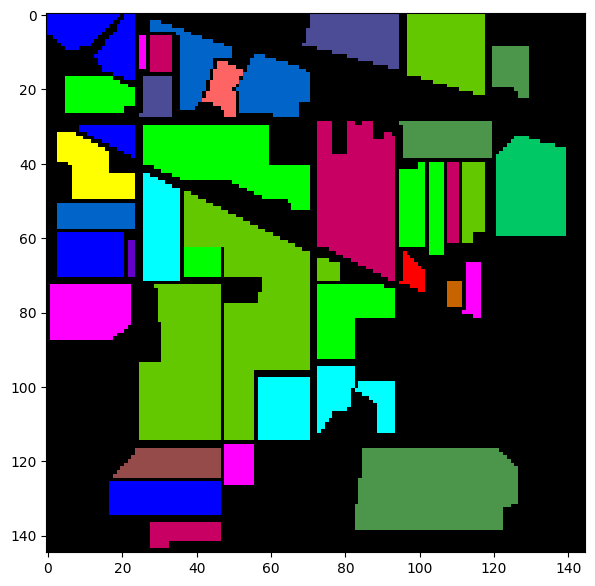

In [ ]:
ground_truth = spectral.imshow(classes = y,figsize =(7,7))

In [ ]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from scipy.io import loadmat
annots = loadmat('/content/Indian_pines_gt.mat')

In [ ]:
annots

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:25:41 2011',
 '__version__': '1.0',
 '__globals__': [],
 'indian_pines_gt': array([[3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 40.2 MB/s eta 0:00:00


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import spectral
# Specify the path to the ENVI data file and the file with .hdr
file = '/content/Skeletalmusclecells.bil'
header_file = '/content/Skeletalmusclecells.bil.hdr'

# Open the ENVI image using rasterio
with rasterio.open(file) as src:
    # Read the hyperspectral data into a NumPy array
    hyperspectral_data = src.read()

    # Display information about the hyperspectral data
    print('Shape of hyperspectral data:', hyperspectral_data.shape)
    print('Number of bands:', src.count)

#Here we can see the wavelengths of the data
img = spectral.open_image(header_file)

# Access the wavelengths associated with each band
wavelengths = img.bands.centers

# Display information about the hyperspectral data and wavelengths
print('Shape of hyperspectral data:', img.shape)
print('Number of bands:', img.shape[2])
print('Wavelengths:', wavelengths)
    # You can now work with the hyperspectral data using NumPy operations

Shape of hyperspectral data: (154, 500, 533)
Number of bands: 154
Shape of hyperspectral data: (500, 533, 154)
Number of bands: 154
Wavelengths: [389.923333333, 393.873333333, 397.82, 401.77, 405.72, 409.673333333, 413.626666667, 417.58, 421.536666667, 425.49, 429.45, 433.41, 437.37, 441.33, 445.29, 449.25, 453.21, 457.176666667, 461.14, 465.106666667, 469.073333333, 473.04, 477.01, 480.98, 484.95, 488.923333333, 492.896666667, 496.866666667, 500.843333333, 504.82, 508.796666667, 512.773333333, 516.753333333, 520.733333333, 524.713333333, 528.696666667, 532.68, 536.66, 540.65, 544.63, 548.62, 552.61, 556.6, 560.59, 564.58, 568.57, 572.56, 576.556666667, 580.55, 584.546666667, 588.54, 592.54, 596.54, 600.536666667, 604.54, 608.54, 612.543333333, 616.546666667, 620.553333333, 624.556666667, 628.563333333, 632.573333333, 636.58, 640.59, 644.6, 648.61, 652.623333333, 656.64, 660.65, 664.67, 668.686666667, 672.7, 676.72, 680.74, 684.76, 688.78, 692.806666667, 696.83, 700.853333333, 704.88, 

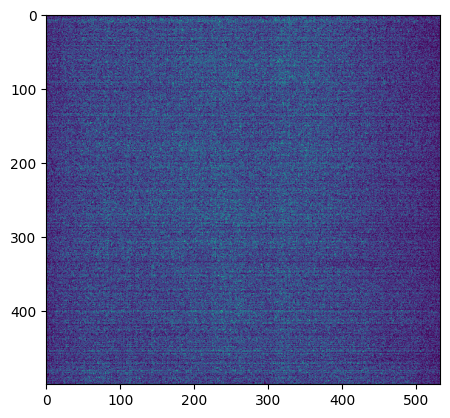

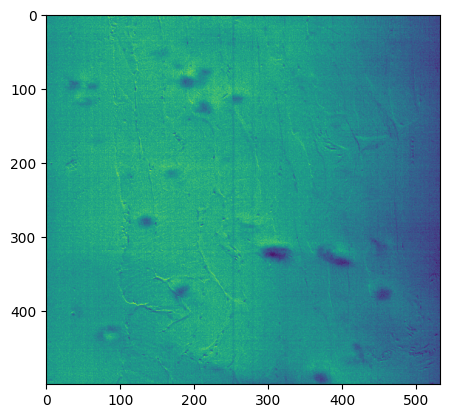

In [ ]:
#Let's show specific wavelengths
ind = wavelengths.index(425.49)
plt.imshow(hyperspectral_data[ind,:,:])
plt.show()

ind = wavelengths.index(704.88)
plt.imshow(hyperspectral_data[ind,:,:])
plt.show()

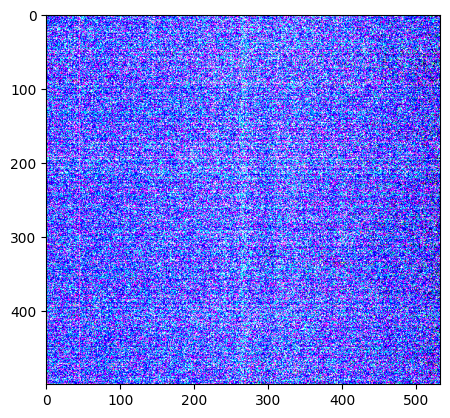

In [ ]:
#Let's combine a short, middle and long wavelength
img = np.zeros([500, 533, 3], np.float32)

ind1 = wavelengths.index(773.463333333)
ind2 = wavelengths.index(895.2)
ind3 = wavelengths.index(993.233333333)

img[:,:,2] = hyperspectral_data[ind1,:,:]
img[:,:,1] = hyperspectral_data[ind2,:,:]
img[:,:,0] = hyperspectral_data[ind3,:,:]
plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
import spectral.io.envi as envi
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

datafile = '/content/Skeletalmusclecells.bil'
hdrfile = '/content/Skeletalmusclecells.bil.hdr'

hcube = envi.open(hdrfile, datafile)
img = hcube.load()


img = img.astype(float)
m, n, l = img.shape

In [ ]:
m, n, l

(500, 533, 154)

In [ ]:
sig = np.zeros((7, l))
sig

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])